<a href="https://colab.research.google.com/github/lonebots/TSF-internship/blob/main/task-1-object_detection/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Custom Object Detector

  This is a custom object detection model that can be trained to detect various classes of objects with great accuracy. He were use openCV and YOLO(using darknet) for building the model. This model is trained to detect the pinapple ( it is a single class of object data set collected from google open data set) The same model can be enhanced and trained over mulitiple classes)

### **Start Here!!**

In [ ]:
#for setting symbolic link to mydrive
#if error the the symbolic link already exit( don't worry you are all good to GO!)

!ln -s /content/drive/My\ Drive/ /mydrive

In [ ]:
#getting in to the darknet project directory and to darknet after that
#go to this directory for testing rest of the things are already set up instide

%cd /mydrive/darknetproject/darknet

/content/drive/My Drive/darknetproject/darknet


In [ ]:
#its already set up in the directory so no need to run

!git clone "https://github.com/AlexeyAB/darknet"

In [ ]:
!make

In [ ]:
!ls


3rdparty	      DarknetConfig.cmake.in  net_cam_v4.sh
backup		      darknet_images.py       obj
bad.list	      darknet.py	      predictions.jpg
build		      darknet_video.py	      README.md
build.ps1	      data		      results
build.sh	      image_yolov3.sh	      scripts
cfg		      image_yolov4.sh	      src
chart.png	      include		      video_yolov3.sh
chart_yolov4-obj.png  json_mjpeg_streams.sh   video_yolov4.sh
cmake		      LICENSE		      yolov4.conv.137
CMakeLists.txt	      Makefile
darknet		      net_cam_v3.sh


In [ ]:
%cd ..


/content/drive/My Drive/darknetproject


### **git cloning to OIDV4 toolkit**
###### **(only for reference don't run this again)**

In [ ]:
%cd OIDv4_ToolKit

In [ ]:
#installing the requirements 
#if you are in colab most of the requirements will be already satisfied and the updation occurs
#reload and reconnect the colab to apply the changes

pip install -r requirements.txt

In [ ]:
#changing directory to the OIDV$4_ToolKit folder

%cd /mydrive/darknetproject/OIDv4_ToolKit

### **Downloading and data set and changing the annotation**
###### **(only for reference don't run this again)**

In [ ]:
#command for downloading the images from the google open images dataset(training set) and saving in to the OID folder in OIDV4_ToolKit

!python main.py downloader --classes Pineapple --type_csv train --limit 200

In [ ]:
#command for downloading the images from the google open images dataset(testing or validation set) and saving in to the OID folder in OIDV4_ToolKit
#limit the set to download less number of images

!python main.py downloader --classes Pineapple --type_csv validation --limit 50

In [ ]:
#command for changing the annotation of the downloaded dataset before feeding it in to the darknet for training

!python convert_annotations.py

In [ ]:
#gerating the test.txt and train.txt
#%cd mydrive/yolov4
#!python generate_train.py

!python generate_test.py

In [ ]:
#downloading the pretrained weights

!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

### **MOdel Training!!**
###### **(only for reference don't run this again unless you want to make changes in weights and improve accuracy!)**

In [ ]:
#run this if the prompt says permission denied!!

!chmod 777 darknet

In [ ]:
#command for the starting the training the custom google images data set

!./darknet detector train ../../yolov4/obj.data ../../yolov4/yolov4-obj.cfg ../../yolov4/backup/yolov4-obj_last.weights -dont_show 

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
yolov4-obj
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  

In [ ]:
#command for calculating the -mAP over the trained weights
#run this only if you want to calculate the mAP of the model

!./darknet detector map ../../yolov4/obj.data ../../yolov4/yolov4-obj.cfg ../../yolov4/backup/yolov4-obj_1000.weights

### **Model Testing!**
###### **(feed it with custom images of pinapple!)**

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)

!./darknet detector test ../../yolov4/obj.data ../../yolov4/yolov4-obj.cfg ../../yolov4/backup/yolov4-obj_last.weights ../../yolov4/custom-test/p5.jpg -thresh 0.6

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 

In [ ]:
#ignore this it was just a test fuction for displaying the prediction.jpg image
#its not working properly

import matplotlib.image as mpimg 
from matplotlib.pyplot import imshow
%matplotlib inline
testim = mpimg.imread('predictions.jpg')
imshow(testim)

In [ ]:
#helper function imShow
#run this to set up the imShow(<path>) function 

# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

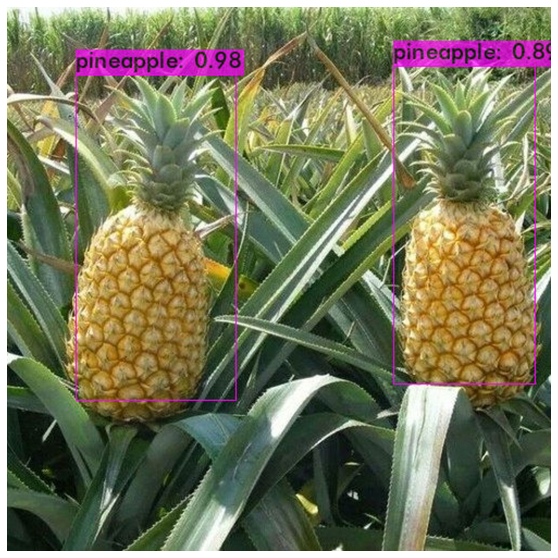

In [ ]:
#run this to display the currently tested image

imShow('predictions.jpg')